In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Define parameters
save_dir = '/u/trappist-r0/bato/work/calval-CSLC/Rosamond/RLE/'
outcsv1 = 'RLE_ts_t064_135523_iw2.csv'
burst_id = 't064_135523_iw2'
cr_network = 'Rosamond'

In [4]:
# Read csv results
df = pd.read_csv(f'{save_dir}/summary/{outcsv1}', sep=',', header=1)
df.columns = ['dates','GRg_avg','GRg_std','az_avg','az_std']
df['dates'] = pd.to_datetime(df['dates'],format='%Y-%m-%d')

In [7]:
df['GRg_avg'] = df['GRg_avg'] -df['GRg_avg'][0]
df['az_avg'] = df['az_avg'] -df['az_avg'][0]

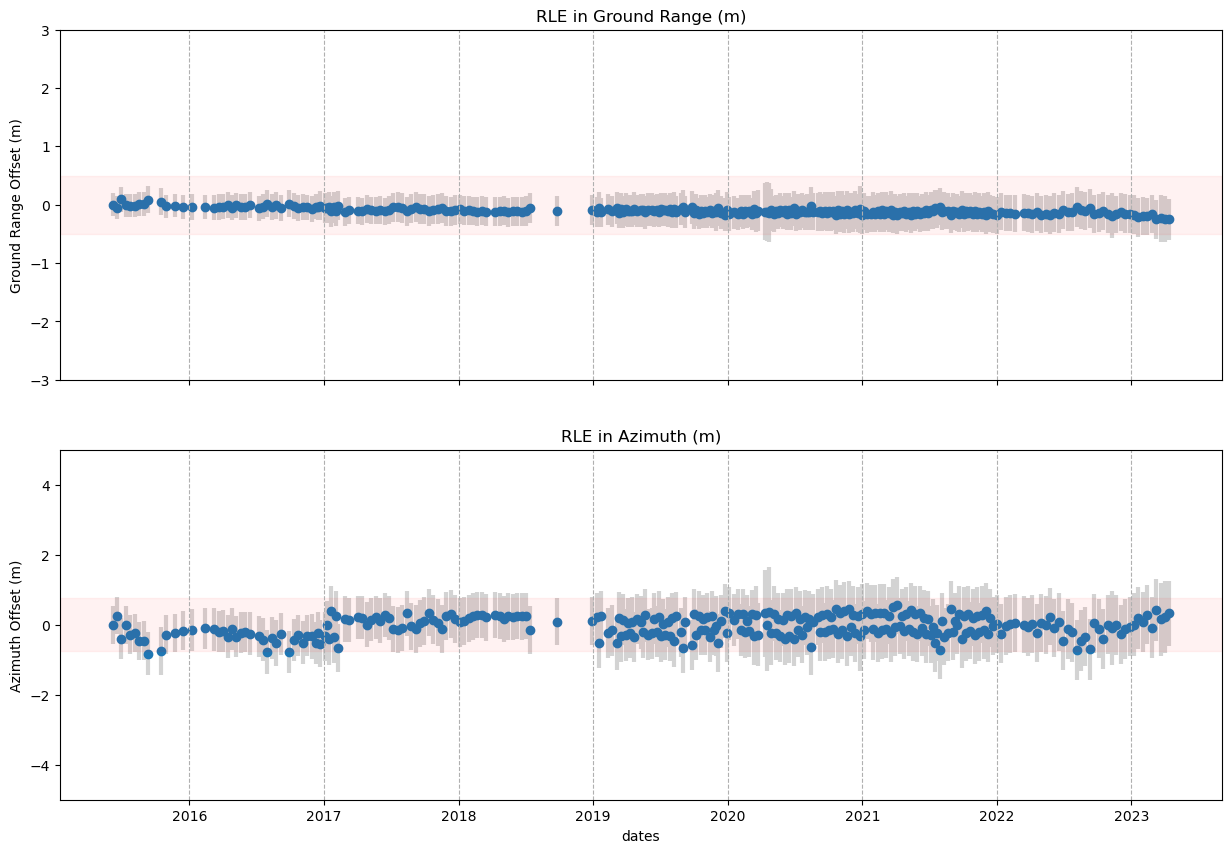

In [8]:
# Plot results
fig, ax = plt.subplots(2,1,figsize=(15,10),sharex=True)
ax[0].set_title('RLE in Ground Range (m)')
ax[0].axhspan(-0.5,0.5,color='red', alpha=0.05)
ax[0].errorbar(df['dates'],df['GRg_avg'],df['GRg_std'],marker='o',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0)
ax[0].set_ylim(-3,3)
ax[0].grid(axis='x',linestyle='--')
ax[0].set_ylabel('Ground Range Offset (m)')

ax[1].set_title('RLE in Azimuth (m)')
ax[1].axhspan(-0.75,0.75,color='red', alpha=0.05)
ax[1].errorbar(df['dates'],df['az_avg'],df['az_std'],marker='o',linestyle=' ',ecolor='lightgray', elinewidth=3, capsize=0, zorder=0)
ax[1].set_xlabel('dates')
ax[1].set_ylim(-5,5)
ax[1].grid(axis='x',linestyle='--')
ax[1].set_ylabel('Azimuth Offset (m)')
fig.savefig(f'{save_dir}/summary/RLE_ts_grngazi.png',dpi=300,bbox_inches='tight')